# Introduction to Portfolio Construction Week 1 Quiz

> Read in the data in the file “Portfolios_Formed_on_ME_monthly_EW.csv” as we did in the lab sessions.We performed a series of analysis on the ‘Lo 10’ and the ‘Hi 10’ columns which are the returns of the lowest and highest decile portfolios. For purposes of this assignment, we will use the lowest and highest quintile portfolios, which are labelled ‘Lo 20’ and ‘Hi 20’ respectively.


In [1]:
import pandas as pd

Folder="C:/Users/msugi/OneDrive/Desktop/DataScience/Courses/05. Investment Management & Machine Learning/01 Intro Portfolio Construction/Resources/data/"
filename2="Portfolios_Formed_on_ME_monthly_EW.csv"
Path2=Folder + filename2
    
historical_data = pd.read_csv(Path2,
                       header=0, index_col=0, na_values=-99.99)

# Specify the quintile labels:
returns = historical_data[['Lo 20', 'Hi 20']]
#returns.columns = ['SmallCap', 'LargeCap']
returns = returns/100
returns.index = pd.to_datetime(returns.index, format="%Y%m").to_period('M')
print(returns.shape)
returns.head()

(1110, 2)


,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


## Question 1: 

> What was the Annualized Return of the Lo 20 portfolio over the entire period?

## Question 3: 
> What was the Annualized Return of the Hi 20 portfolio over the entire period?

Here, I will use 
 * numpy's np**__.prod()__** to calculate the compound rate of return.
 * pd.shape[0] to calculate the number of months


In [2]:
import numpy as np
((np.prod(returns + 1)**(12/returns.shape[0])-1)*100).round(2)


Lo 20    15.20
Hi 20     9.85
dtype: float64

## Question 2:

> What was the Annualized Volatility of the Lo 20 portfolio over the entire period? 

## Question 4:

> What was the Annualized Volatility of the Hi 20 portfolio over the entire period? 

It's a classic question, I need to convert monthly volatility to annual one, by multiplying the monthly volatility with the square root of 12 months.

In [3]:
returns.std()*(12**0.5)*100

Lo 20    33.670128
Hi 20    19.511604
dtype: float64

## Question 5: 
> What was the Annualized Return of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 

## Question 7
> What was the Annualized Return of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?



Here, I will use Boolean Mask to select the period.


In [4]:
return_1=returns.loc["1999-01":"2015-12"]
return_1

,Lo 20,Hi 20
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
...,...,...
2015-08,-0.0347,-0.0559
2015-09,-0.0610,-0.0333
2015-10,0.0385,0.0710
2015-11,0.0165,0.0015


In [5]:
((np.prod(return_1 + 1)**(12/return_1.shape[0])-1)*100).round(2)

Lo 20    11.44
Hi 20     6.29
dtype: float64

## Question 6

> What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 

## Question 8
> What was the Annualized Volatility of the Hi 20 portfolio over the period 1999 - 2015 (both inclusive)? 




In [6]:
return_1.std()*(12**0.5)*100

Lo 20    22.889447
Hi 20    17.271332
dtype: float64

## Question 9

> What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?

Here is the 4 step process of computing Maximum Drawdown

>   * Convert the time series of returns to a time series that represents a wealth index
>   * Compute a time series of the previous peaks
>   * Compute the Drawdown as: (the current value - the previous peak)/the previous peak
>   * Compute the minimum of the historical Drawdowns

### Q9 Step 1) Wealth Index

In order to calculate Maximum Drawdown, I need to calculate Wealth Index (Cummulative Asset Value of the iniial investment of USD1).

I use **__.cumprod() method__** to calculate the Wealth Index.

Let me plot the Wealth Index.

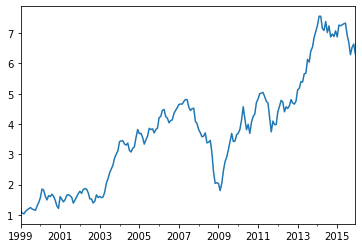

In [7]:
wealth_index_Lo = (1+return_1["Lo 20"]).cumprod()
wealth_index_Lo.plot()

### Q9 Step 2) Historical Peak

here, I will use **__.cummax() method__** to calculate the historical highs.


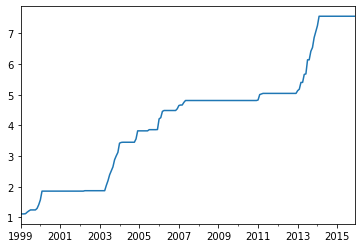

In [8]:
previous_peaks_Lo = wealth_index_Lo.cummax()
previous_peaks_Lo.plot()

### Q9 Step 3) Drawdown

Now, Drawdown is just the gap between these two lines in proportion to the historical high. (%)
 * ( Current Value - Historical Peak ) / Historical Peak 


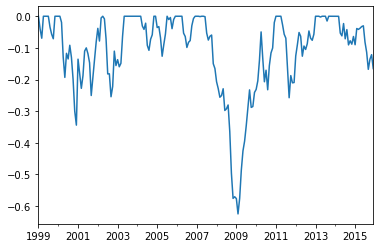

In [9]:
Drawdown_Lo = ( wealth_index_Lo - previous_peaks_Lo )/ previous_peaks_Lo
Drawdown_Lo.plot()

### Q9 Step 4) Maximum Drawdown

Now, compute the minimum value of the historical Drawdowns.


In [10]:
Drawdown_Lo.min()*100

-62.48092431236988

## Question 10 
> At the end of which month over the period 1999-2015 did that maximum drawdown on the SmallCap (Lo 20) portfolio occur? 

Here, I need to identify the time, the index value that corresponds to the Maximum Drawdown value identified in Question 9.

I will use **__.idxmin()__** here to do that.


In [11]:
Drawdown_Lo.idxmin()

Period('2009-02', 'M')

## Question 11
> What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the LargeCap (Hi 20) portfolio?

I will do the same process as Question 9 to 'Hi 20' data.


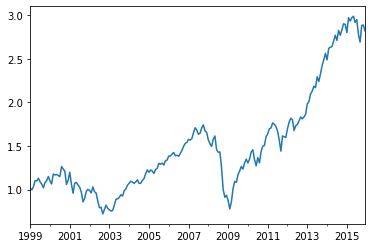

In [12]:
wealth_index_Hi = (1+return_1["Hi 20"]).cumprod()
wealth_index_Hi.plot()

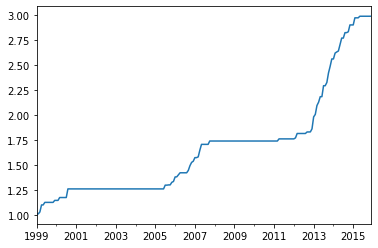

In [13]:
previous_peaks_Hi = wealth_index_Hi.cummax()
previous_peaks_Hi.plot()

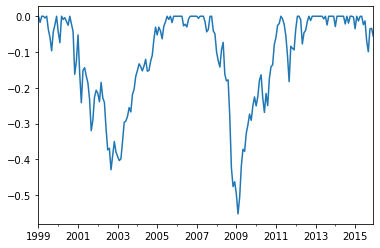

In [14]:
Drawdown_Hi = ( wealth_index_Hi - previous_peaks_Hi )/ previous_peaks_Hi
Drawdown_Hi.plot()

In [15]:
Drawdown_Hi.min()*100

-55.27349978713653

## Question 12
> Over the period 1999-2015, at the end of which month did that maximum drawdown of the LargeCap (Hi 20) portfolio occur?

As same as Question 10.

In [16]:
Drawdown_Hi.idxmin()

Period('2009-02', 'M')

# EDHEC Hedge Fund Indices



In [17]:
Folder="C:/Users/msugi/OneDrive/Desktop/DataScience/Courses/05. Investment Management & Machine Learning/01 Intro Portfolio Construction/Resources/data/"
filename3="edhec-hedgefundindices.csv"
Path3=Folder + filename3
    
hfi = pd.read_csv(Path3,
                      header=0, index_col=0, parse_dates=True)
hfi = hfi/100
hfi.index = hfi.index.to_period('M')
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


## Question 13
> Looking at the data since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation? 


### Semideviation

I would say that 'semideviation' is the standard deviation of data below the average.

Nevertheless, somehow, the lecture defines 'semideviation' as the standard deviation of negative return dataset.
So, I will follow this definition of 'semideviation' as the standard deviation of negative data for this question.


In [18]:
def semideviation(r):
    """
    Returns the semideviation as the standard deviation of negative return sub-dataset.
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)


In [19]:
hfi_post2009=hfi.loc["2009-01":]
type(semideviation(hfi_post2009))
HFI_Summary=semideviation(hfi_post2009).to_frame(name="Semideviation (Post 2009)")
HFI_Summary

,Semideviation (Post 2009)
Convertible Arbitrage,0.006681
CTA Global,0.010996
Distressed Securities,0.009498
Emerging Markets,0.015276
Equity Market Neutral,0.005186
Event Driven,0.010135
Fixed Income Arbitrage,0.003321
Global Macro,0.005075
Long/Short Equity,0.012139
Merger Arbitrage,0.003611


In order to locate the asset type of the maximum semideviation, I use **__.idxmax()__**

In [20]:
semideviation(hfi_post2009).idxmax()

'Short Selling'

## Question 14
> Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has exhibited the lowest semideviation? 

In [21]:
semideviation(hfi_post2009).idxmin()

'Fixed Income Arbitrage'

## Question 15
> Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has been most negatively skewed? 

In [22]:
hfi_post2009.shape

(119, 13)

In [25]:
import scipy.stats
HFI_Summary["Skew (Post 2009)"] = scipy.stats.skew(hfi_post2009)
HFI_Summary

,Semideviation (Post 2009),Skew (post 2009),Skew (Post 2009)
Convertible Arbitrage,0.006681,1.305911,1.305911
CTA Global,0.010996,0.052062,0.052062
Distressed Securities,0.009498,-0.254944,-0.254944
Emerging Markets,0.015276,0.033123,0.033123
Equity Market Neutral,0.005186,-0.896327,-0.896327
Event Driven,0.010135,-0.488821,-0.488821
Fixed Income Arbitrage,0.003321,1.121453,1.121453
Global Macro,0.005075,0.348184,0.348184
Long/Short Equity,0.012139,-0.463703,-0.463703
Merger Arbitrage,0.003611,-0.551065,-0.551065


In [26]:
HFI_Summary.loc[HFI_Summary["Skew (Post 2009)"].idxmin()].to_frame()
#type(HFI_Summary.loc[HFI_Summary["Skew"].idxmin()])

,Equity Market Neutral
Semideviation (Post 2009),0.005186
Skew (post 2009),-0.896327
Skew (Post 2009),-0.896327


## Question 16
> Looking at the data since 2000 (including all of 2000) through 2018 which Hedge Fund Index has exhibited the highest kurtosis? 

First, define the new dataset since Y 2000.

In [27]:
hfi_post2000=hfi.loc["2000-01":]
hfi_post2000

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2000-01,0.0227,0.0128,0.0088,0.0077,0.0075,0.0088,0.0041,0.0021,0.0075,0.0143,0.0173,0.0427,0.0169
2000-02,0.0267,-0.0022,0.0421,0.0528,0.0253,0.0346,0.0097,0.0408,0.0699,0.0239,0.0185,-0.1340,0.0666
2000-03,0.0243,-0.0138,0.0103,0.0318,0.0134,0.0069,-0.0061,-0.0104,0.0006,0.0131,0.0163,-0.0230,0.0039
2000-04,0.0223,-0.0241,-0.0101,-0.0541,0.0168,-0.0059,-0.0006,-0.0304,-0.0201,0.0188,0.0092,0.1028,-0.0269
2000-05,0.0149,0.0114,-0.0132,-0.0433,0.0062,-0.0034,0.0107,-0.0070,-0.0097,0.0146,0.0080,0.0704,-0.0122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


In [30]:
HFI_Summary["Kurtosis (Post 2000)"]= scipy.stats.kurtosis(hfi_post2000)
HFI_Summary["Kurtosis (Post 2000)"].idxmax()

'Fixed Income Arbitrage'